In [1]:
from prevelop import preparation, exploration, clustering, evaluation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

__Data Preparation and Preprocessing__

In [3]:
# cad-data (Macbook)
file = '/Users/kaspar/Documents/FIR/Prevelop/data/Simus/csvfolding-2025-03-19_13-23-25.csv'

In [4]:
# cad-data (IM-KI)
# file = 'C:/Users/IM-KI/Documents/PrEvelOp_Docs/Export_classmate/csvfolding-2025-03-19_13-23-25.csv'

In [5]:
### load cad-data
cad_data, num_columns_cad, cat_columns_cad = preparation.load_simus_data(file)

In [6]:
cad_data.head()

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,Innenform_einseitig steigend,Innenform_EXCENTR_001,Innenform_Durchgangsbohrung gesenkt,Innenform_ungleichmäßiger Einstich Konus beidseitig,Innenform_gleichmäßiger Einstich Konus beidseitig,Innenform_beidseitig fallend,Innenform_OTHR_004,Innenform_Sackloch gestuft gesenkt,Innenform_OTHR_005,Innenform_OTHR_009
Zeichnung,,,,,,,,,,,,,,,,,,,,,
3443-693-A-V10-CAM,609.48,22.2,6.0,6.0,6.0,0.0,22.2,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-070-PFA-CAM,5871.83,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-071-PFA-CAM,7590.52,94.5,14.0,14.0,14.0,0.0,94.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-078-PFA-CAM,5925.80,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3500-081-V10-CAM,9216.14,159.5,14.0,14.0,14.0,0.0,159.5,0.0,6.0,3.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
### load the data (Macbook)
# load process-data
process_data = preparation.load_data('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/Römheld_prozess_2.xlsx')
# load link-data	
link_data = preparation.load_data('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/roemheld_teile_zeichnungen_3.xlsx')

In [8]:
# remove rows with duplicates in colunn 'Zeichnung' in link-data
link_data = link_data.drop_duplicates(subset=['Zeichnung'], keep='first')

In [39]:
## load the data (IM-KI)
# # load process-data
# process_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\Römheld_prozess_3.xlsx")
# # load link data
# link_data = preparation.load_data(r"C:\Users\IM-KI\Documents\PrEvelOp_Daten_Römheld\roemheld_teile_zeichnungen_3.xlsx")

In [9]:
# aggreagate process data
process_data = process_data[process_data['BELEGUNGSEINHEIT_NR'] != 99999]
process_data, num_columns_process, cat_columns_process  = preparation.aggregate_data(process_data, 'Teil', ['BELEGUNGSEINHEIT_NR','RUESTZEIT','VORLAUFZEIT'],['encode','mean','mean'])

In [10]:
### prepare the data
# select numerical, binary and categorical columns for preprocessing
num_columns = num_columns_cad + num_columns_process
cat_columns = cat_columns_cad + cat_columns_process
data, data_preprocessed = preparation.prepare_data(cad_data, num_columns, cat_columns, process_data=process_data, link_data=link_data)

In [42]:
# remove columns in data and data_preprocessed containing the substring 'nan'
data = data.loc[:, ~data.columns.str.contains('nan')]
data_preprocessed = data_preprocessed.loc[:, ~data_preprocessed.columns.str.contains('nan')]
# remove columns in data and data_preprocessed containing the substring 'Unnamed'
data = data.loc[:, ~data.columns.str.contains('Unnamed')]
data_preprocessed = data_preprocessed.loc[:, ~data_preprocessed.columns.str.contains('Unnamed')]

In [44]:
# drop columns in data and data_preprocessed where more than 95% of the values are 0
data = data.loc[:, (data != 0).mean() > 0.05]
data_preprocessed = data_preprocessed.loc[:, (data_preprocessed != 0).mean() > 0.05]

In [45]:
# drop columns in data and data_preprocessed where more than 95% of the values are 1
data = data.loc[:, (data != 1).mean() > 0.05]
data_preprocessed = data_preprocessed.loc[:, (data_preprocessed != 1).mean() > 0.05]

In [43]:
# remove rows in data and data_preprocessed containing nan values
data = data.dropna()
data_preprocessed = data_preprocessed.dropna()

In [11]:
data

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 62302.0,BELEGUNGSEINHEIT_NR 63712.0,BELEGUNGSEINHEIT_NR 63716.0,BELEGUNGSEINHEIT_NR 63205.0,BELEGUNGSEINHEIT_NR 64102.0,BELEGUNGSEINHEIT_NR 64104.0,BELEGUNGSEINHEIT_NR 62203.0,BELEGUNGSEINHEIT_NR 63101.0,RUESTZEIT,VORLAUFZEIT
Teil,,,,,,,,,,,,,,,,,,,,,
3443693A,609.48,22.2,6.0,6.0,6.0,0.0,22.2,0.0,1.0,2.0,...,0,1,0,0,0,0,0,1,18.750000,0.515000
3500070,5871.83,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,1,1,0,0,1,0,28.000000,1.315000
3500071,7590.52,94.5,14.0,14.0,14.0,0.0,94.5,0.0,5.0,2.0,...,0,0,1,1,0,0,1,0,27.600000,1.330000
3500078,5925.80,72.5,14.0,14.0,14.0,0.0,72.5,0.0,5.0,2.0,...,0,0,1,1,0,0,1,0,27.666667,0.431667
3500081,9216.14,159.5,14.0,14.0,14.0,0.0,159.5,0.0,6.0,3.0,...,0,0,1,1,0,0,1,0,0.100000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716697256,123396.76,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,28.000000,0.506667
716697257,139295.27,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,26.333333,0.390000
716697258,127394.93,90.0,80.0,80.0,80.0,0.0,90.0,9.0,2.0,0.0,...,0,0,0,1,0,0,0,1,23.600000,0.310000


In [ ]:
# ### export data
# # add column 'Teil' to data and data_preprocessed
# data['Teil'] = data.index
# data_preprocessed['Teil'] = data_preprocessed.index
# # export data and data_preprocessed to csv files
# data.to_csv('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/roemheld_data.csv', index=False)
# data_preprocessed.to_csv('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/roemheld_data_preprocessed.csv', index=False)

In [48]:
# load data and data_preprocessed from csv files
data = pd.read_csv('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/roemheld_data.csv')
data_preprocessed = pd.read_csv('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/roemheld_data_preprocessed.csv')
# set column 'Teil' as index and drop it
data = data.set_index('Teil')
data_preprocessed = data_preprocessed.set_index('Teil')
# drop column 'Unnamed: 0' if it exists
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
if 'Unnamed: 0' in data_preprocessed.columns:
    data_preprocessed = data_preprocessed.drop(columns=['Unnamed: 0'])

In [49]:
data_preprocessed

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 63503.0,BELEGUNGSEINHEIT_NR 62301.0,BELEGUNGSEINHEIT_NR 62302.0,BELEGUNGSEINHEIT_NR 63712.0,BELEGUNGSEINHEIT_NR 63716.0,BELEGUNGSEINHEIT_NR 63205.0,BELEGUNGSEINHEIT_NR 64102.0,BELEGUNGSEINHEIT_NR 64104.0,BELEGUNGSEINHEIT_NR 62203.0,BELEGUNGSEINHEIT_NR 63101.0
Teil,,,,,,,,,,,,,,,,,,,,,
3443693A,0.000092,0.010546,0.026087,0.026087,0.026087,0.0,0.010546,0.0,0.1,0.133333,...,0,0,0,1,0,0,0,0,0,1
3500070,0.000883,0.034442,0.060870,0.060870,0.060870,0.0,0.034442,0.0,0.5,0.133333,...,0,0,0,0,1,1,0,0,1,0
3500071,0.001141,0.044893,0.060870,0.060870,0.060870,0.0,0.044893,0.0,0.5,0.133333,...,0,0,0,0,1,1,0,0,1,0
3500078,0.000891,0.034442,0.060870,0.060870,0.060870,0.0,0.034442,0.0,0.5,0.133333,...,0,0,0,0,1,1,0,0,1,0
3500081,0.001385,0.075772,0.060870,0.060870,0.060870,0.0,0.075772,0.0,0.6,0.200000,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716697256,0.018546,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,1.0,0.2,0.000000,...,0,0,0,0,0,1,0,0,0,1
716697257,0.020936,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,1.0,0.2,0.000000,...,0,0,0,0,0,1,0,0,0,1
716697258,0.019147,0.042755,0.347826,0.347826,0.347826,0.0,0.042755,0.9,0.2,0.000000,...,0,0,0,0,0,1,0,0,0,1


__Exploration__

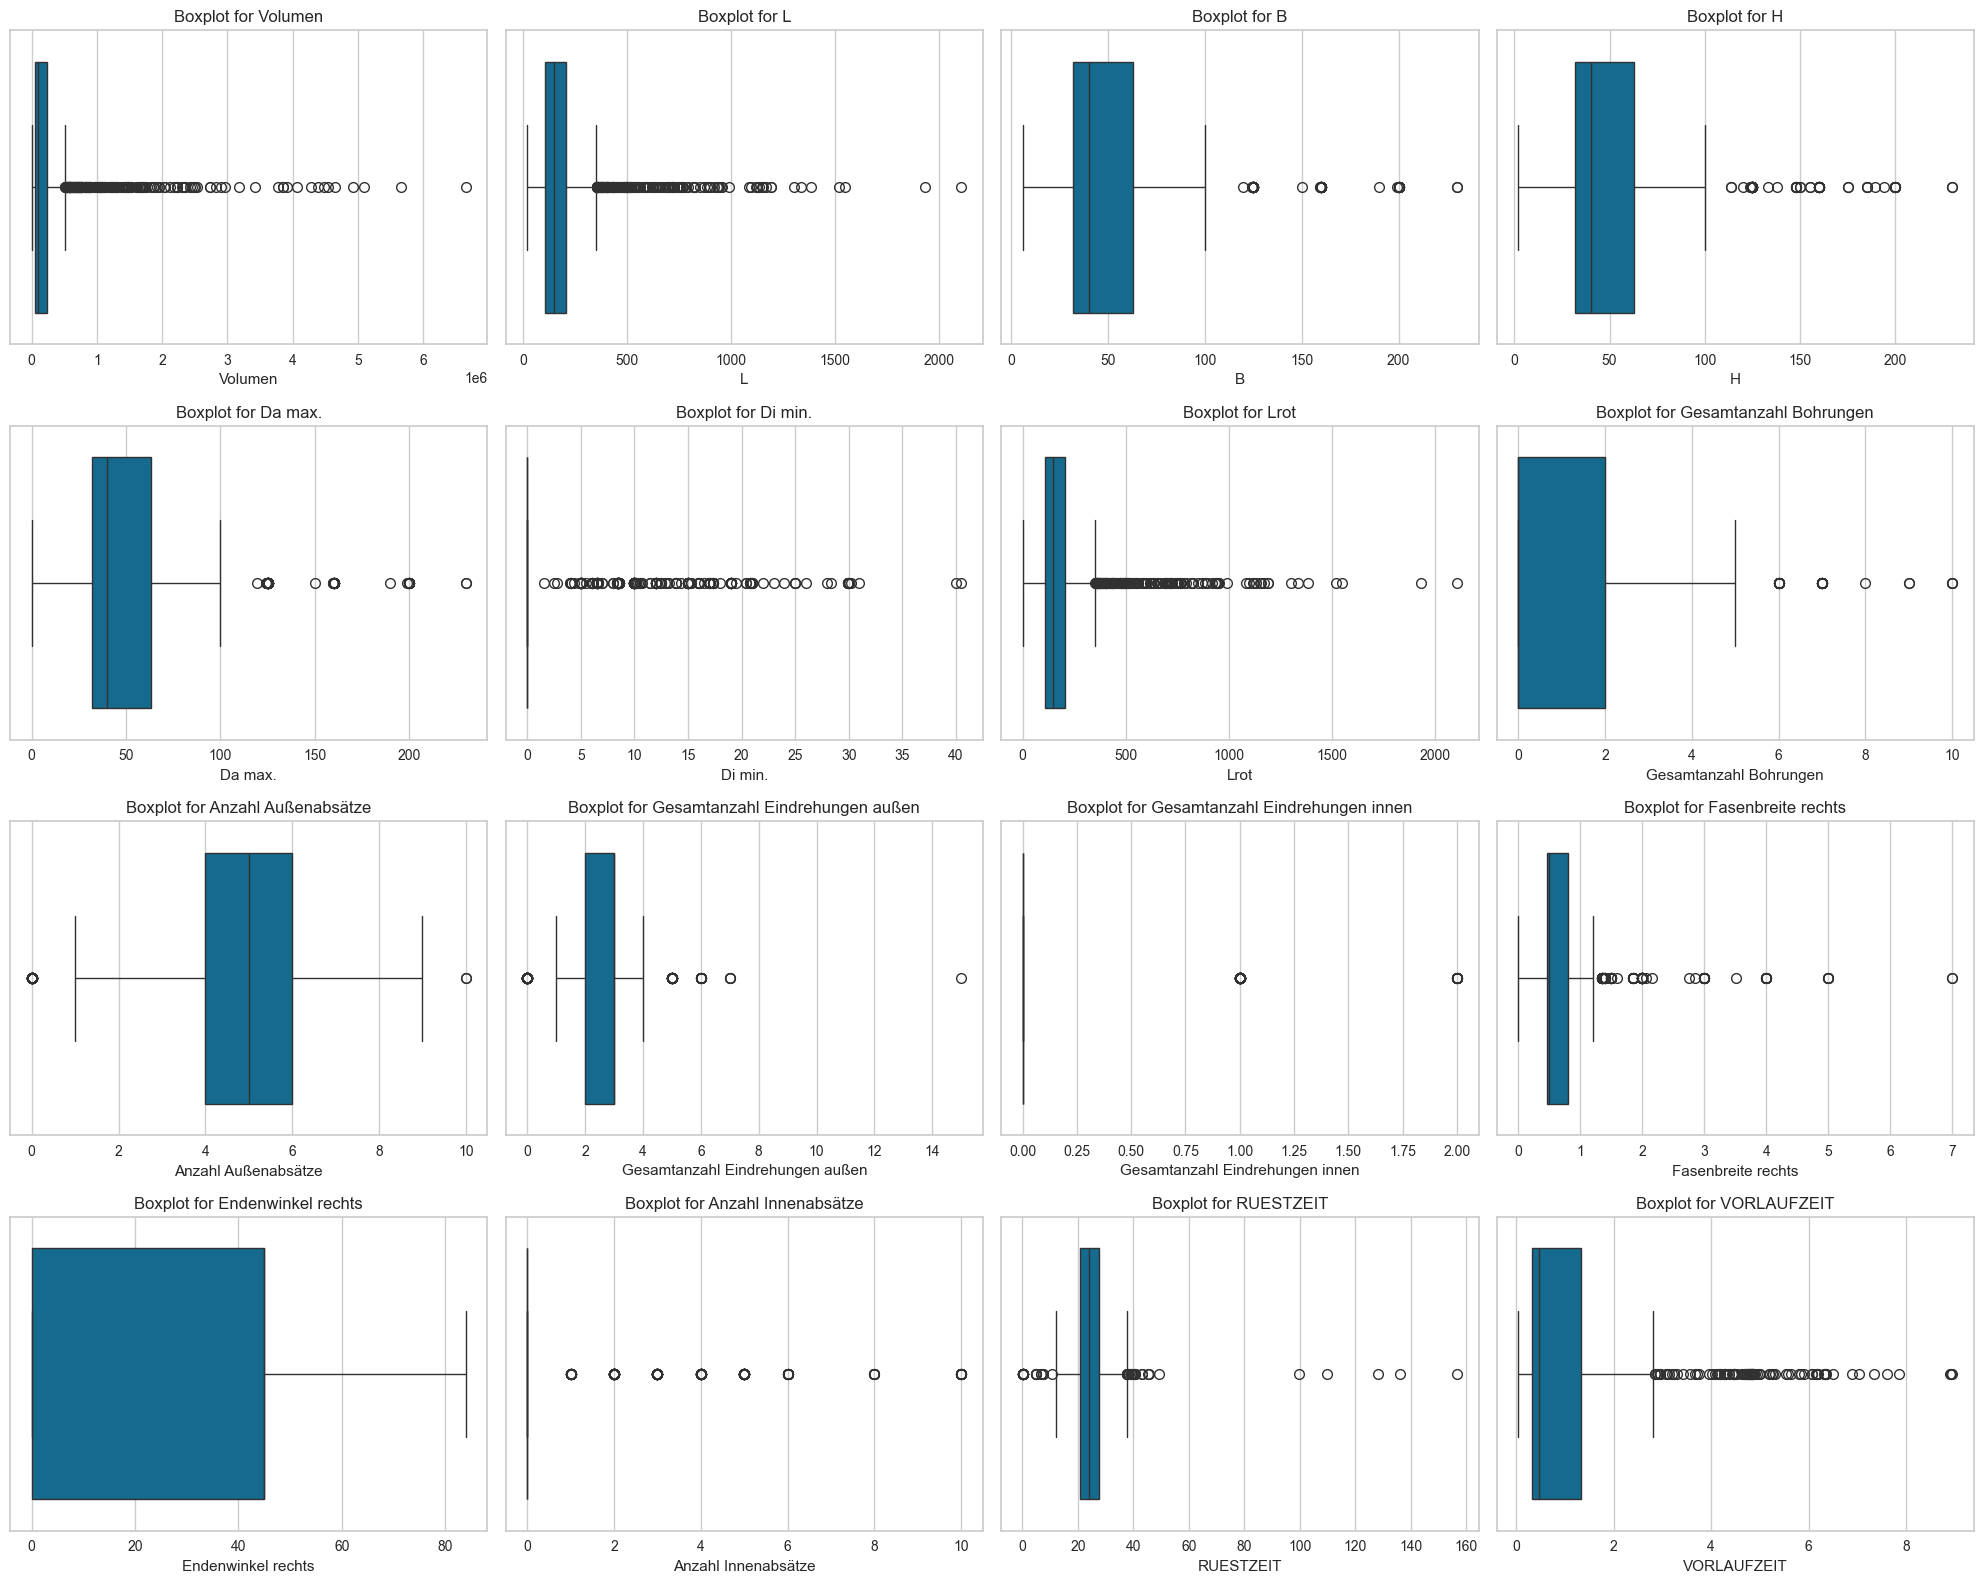

In [12]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

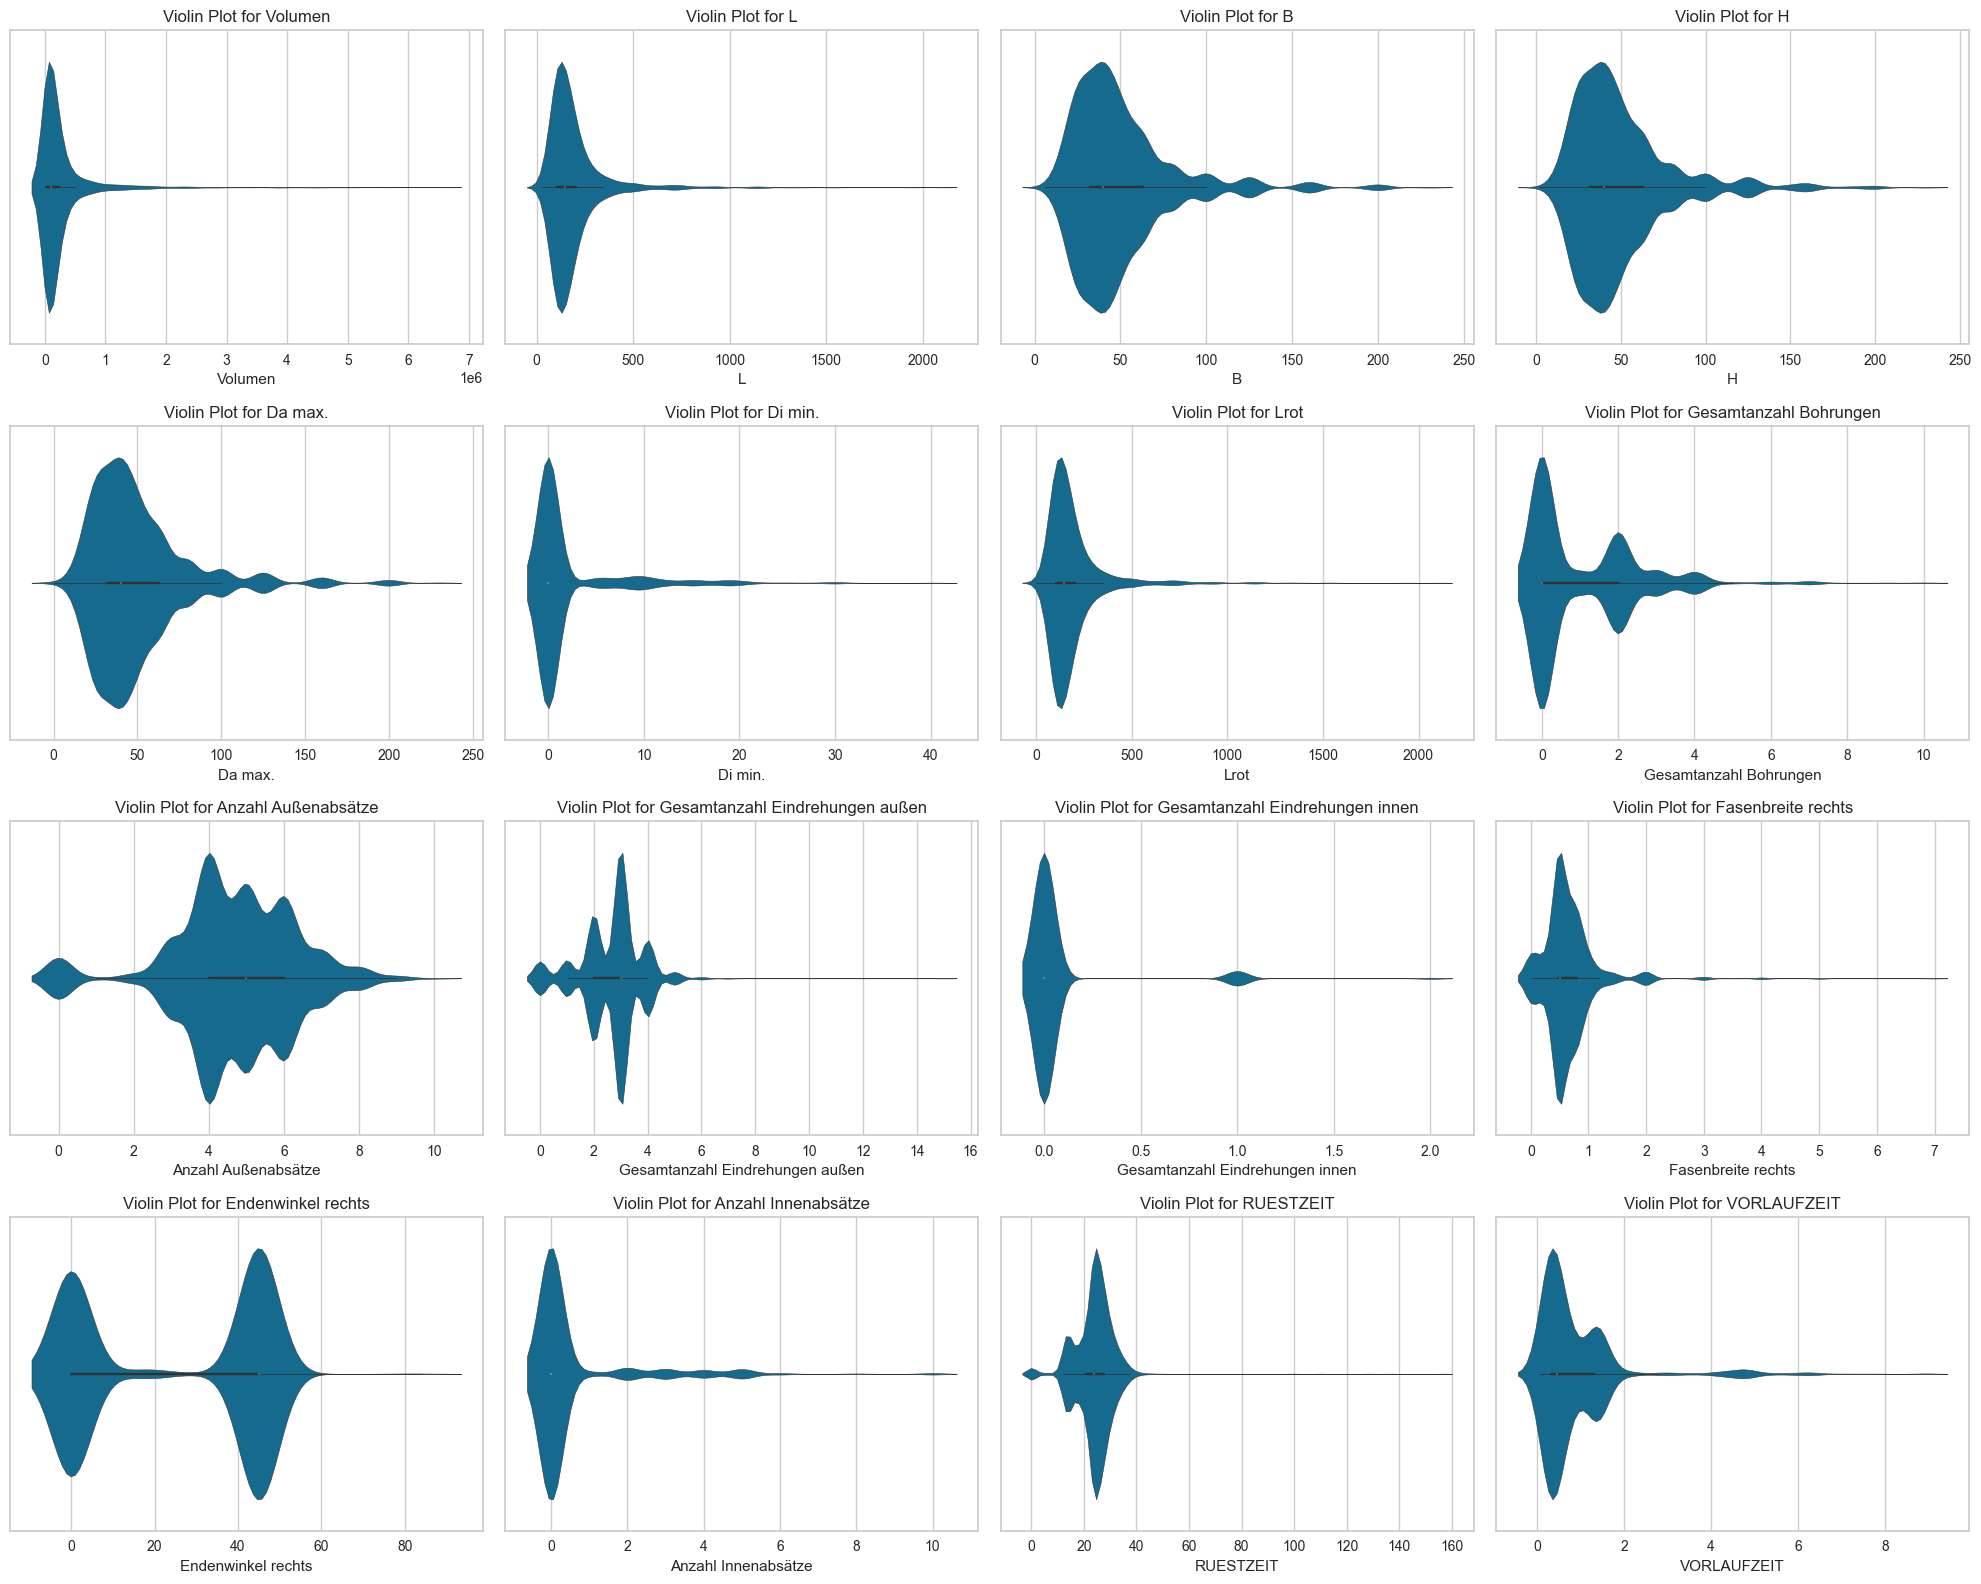

In [13]:
# show violonplot of data
exploration.violinplots(data, num_columns)

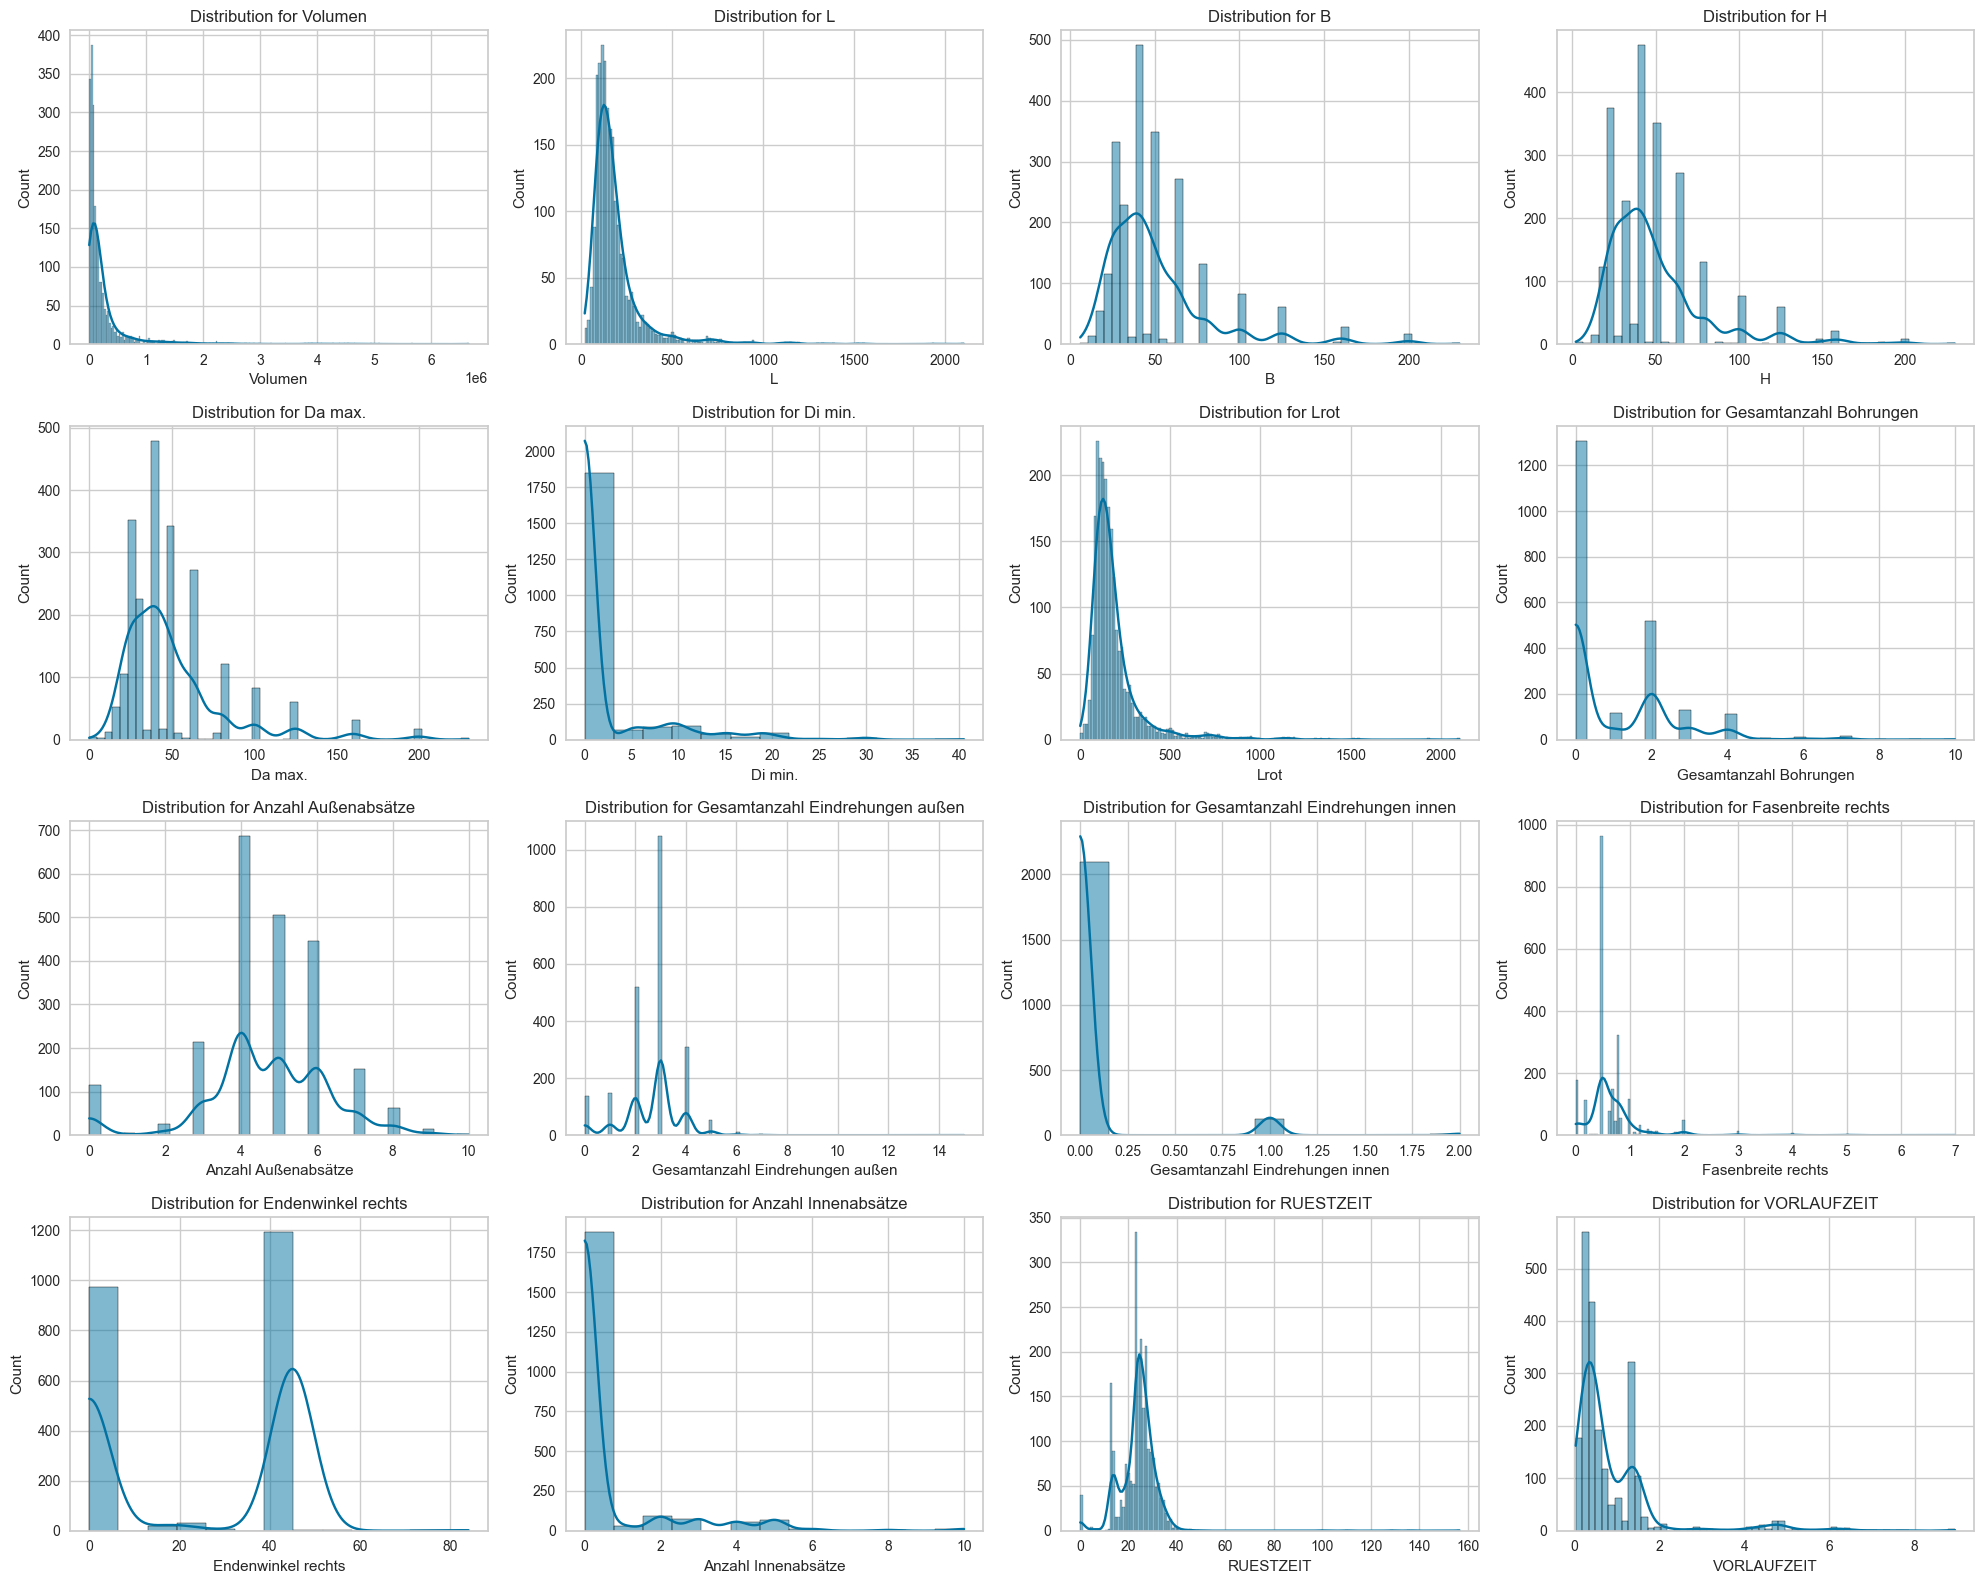

In [14]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

In [15]:
# show parallel_coordinates_plot of data
# exploration.barplots(data, cat_columns)

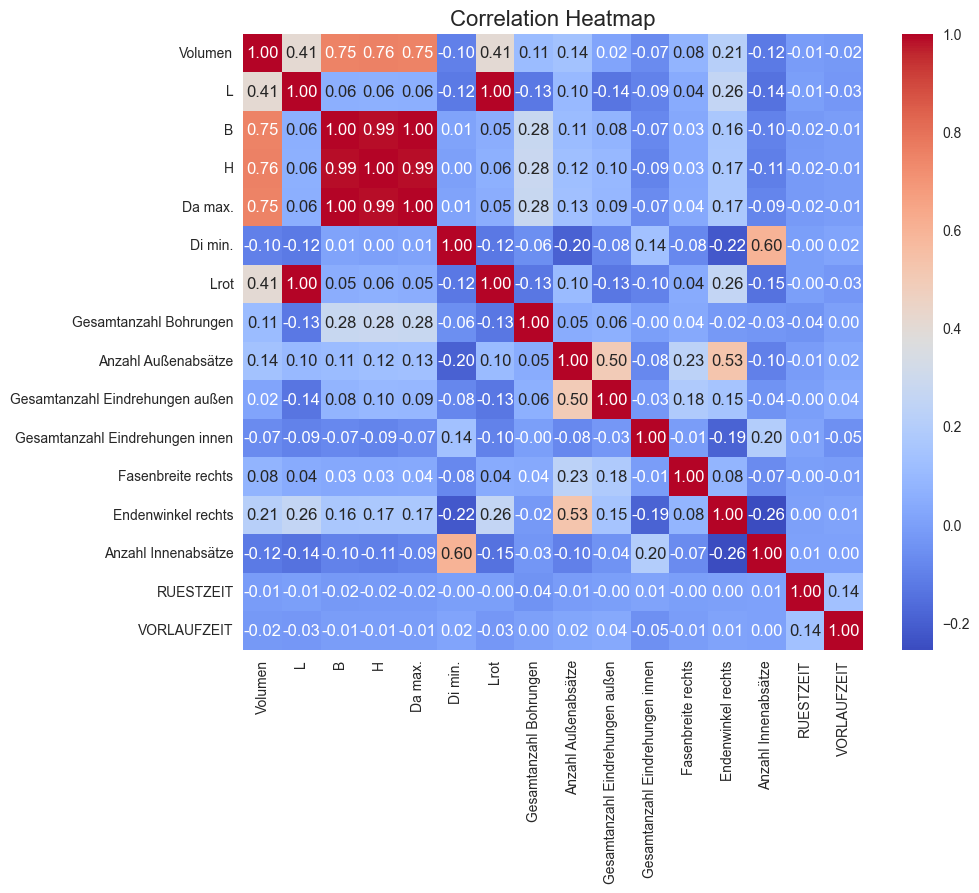

In [16]:
# show heatmap of data
exploration.heatmap(data, num_columns)

In [17]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 62302.0,BELEGUNGSEINHEIT_NR 63712.0,BELEGUNGSEINHEIT_NR 63716.0,BELEGUNGSEINHEIT_NR 63205.0,BELEGUNGSEINHEIT_NR 64102.0,BELEGUNGSEINHEIT_NR 64104.0,BELEGUNGSEINHEIT_NR 62203.0,BELEGUNGSEINHEIT_NR 63101.0,RUESTZEIT,VORLAUFZEIT
Teil,,,,,,,,,,,,,,,,,,,,,
35001048,6637.07,89.0,16.0,16.0,16.0,0.0,89.0,0.0,10.0,4.0,...,0,0,1,1,0,0,1,0,26.333333,0.483333
3500965,73369.90,227.0,32.0,32.0,32.0,0.0,227.0,0.0,4.0,3.0,...,0,1,0,0,0,0,1,0,136.111111,3.425556
35011283,19313.37,93.0,25.0,25.0,25.0,0.0,93.0,0.0,4.0,2.0,...,0,1,0,0,0,0,1,0,24.700000,4.627000
35011294,68695.01,331.0,32.0,32.0,32.0,0.0,331.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,26.166667,4.441667
35011336,33975.74,170.0,25.0,25.0,25.0,0.0,170.0,0.0,10.0,4.0,...,0,1,0,0,0,0,1,0,23.600000,0.318000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716697255,115444.45,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,23.833333,1.388333
716697256,123396.76,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,28.000000,0.506667
716697257,139295.27,90.0,80.0,80.0,80.0,0.0,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,26.333333,0.390000


In [18]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

,Volumen,L,B,H,Da max.,Di min.,Lrot,Gesamtanzahl Bohrungen,Anzahl Außenabsätze,Gesamtanzahl Eindrehungen außen,...,BELEGUNGSEINHEIT_NR 62302.0,BELEGUNGSEINHEIT_NR 63712.0,BELEGUNGSEINHEIT_NR 63716.0,BELEGUNGSEINHEIT_NR 63205.0,BELEGUNGSEINHEIT_NR 64102.0,BELEGUNGSEINHEIT_NR 64104.0,BELEGUNGSEINHEIT_NR 62203.0,BELEGUNGSEINHEIT_NR 63101.0,RUESTZEIT,VORLAUFZEIT
Teil,,,,,,,,,,,,,,,,,,,,,
35021210,14705.63,39.5,39.5,28.0,39.5,15.29,28.0,2.0,2.0,0.0,...,0,0,0,0,1,0,0,1,31.400000,1.326000
35021211,23170.85,39.8,39.8,28.0,39.8,15.29,28.0,2.0,3.0,1.0,...,0,0,0,0,1,0,0,1,14.200000,0.138000
35021346,15973.52,39.8,39.8,23.0,39.8,20.38,23.0,2.0,4.0,1.0,...,0,0,0,0,1,0,0,1,0.100000,1.000000
35021389,28956.60,98.0,24.6,24.6,24.6,0.00,98.0,4.0,5.0,5.0,...,0,0,0,1,0,0,0,1,31.625000,6.340000
35021841,126827.75,127.0,80.0,80.0,80.0,40.00,127.0,0.0,5.0,4.0,...,0,1,0,0,0,1,0,1,24.666667,4.776667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3520002,4539554.63,941.5,80.0,80.0,80.0,0.00,941.5,0.0,4.0,1.0,...,0,0,0,0,1,0,0,1,14.200000,0.138000
6312151,50163.31,75.5,42.0,42.0,42.0,8.38,75.5,2.0,1.0,1.0,...,0,0,1,1,0,0,0,1,18.600000,0.282000
716697255,115444.45,90.0,80.0,80.0,80.0,0.00,90.0,10.0,2.0,0.0,...,0,0,0,1,0,0,0,1,23.833333,1.388333


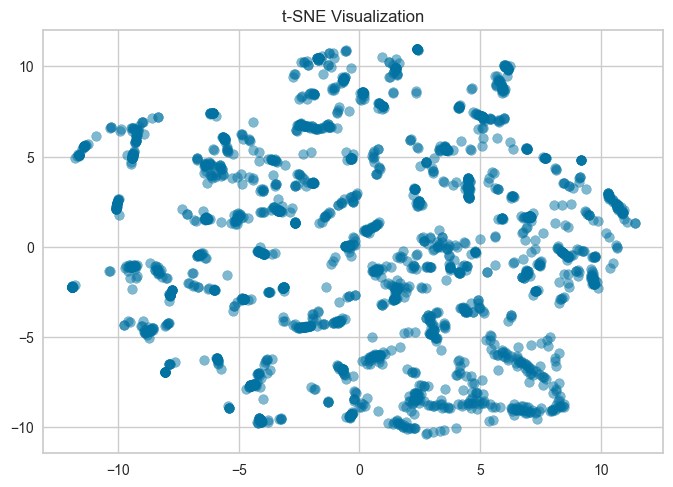

In [19]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data_preprocessed, num_columns)

__Adjustments based on EDA__

In [20]:
# remove colums LRot H and Da max
data = data.drop(columns=['Lrot','H','Da max.'])
data_preprocessed = data_preprocessed.drop(columns=['Lrot','H','Da max.'])

__Clustering__

In [21]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

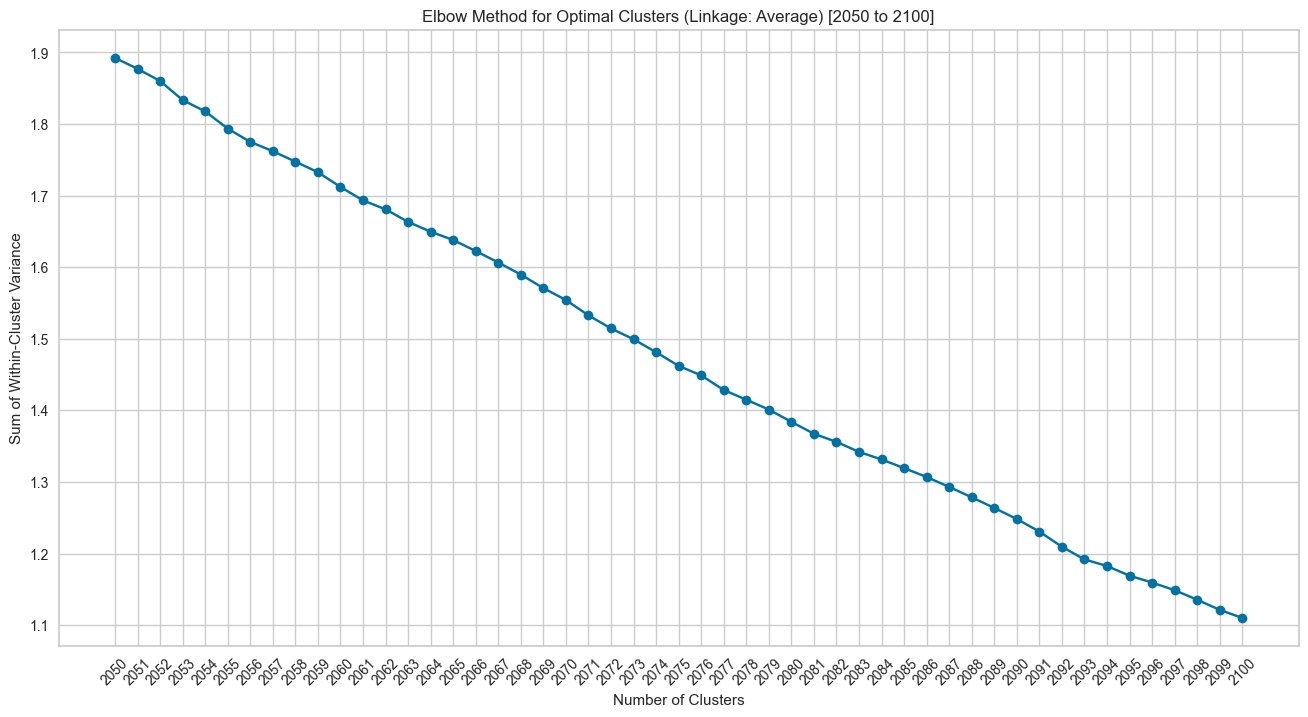

In [ ]:
# ### plot the elbow plot for the first 20 clusters
# clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 2050, 2100)

In [ ]:
# k_list = [1018,1048,1061,1223,1381,1443,1541,1615,1738,1822,1965,2093]

In [ ]:
# df = pd.DataFrame(data={'Teil': data.index})
# for k in k_list:
#     labels = clustering.agglomerative_clustering(distance_matrix, k)
#     df['k=' + str(k)] = labels                  
#     df.to_excel('/Users/kaspar/Documents/FIR/Prevelop/results/roemheld/results_roemheld_aggl.xlsx', index=False)

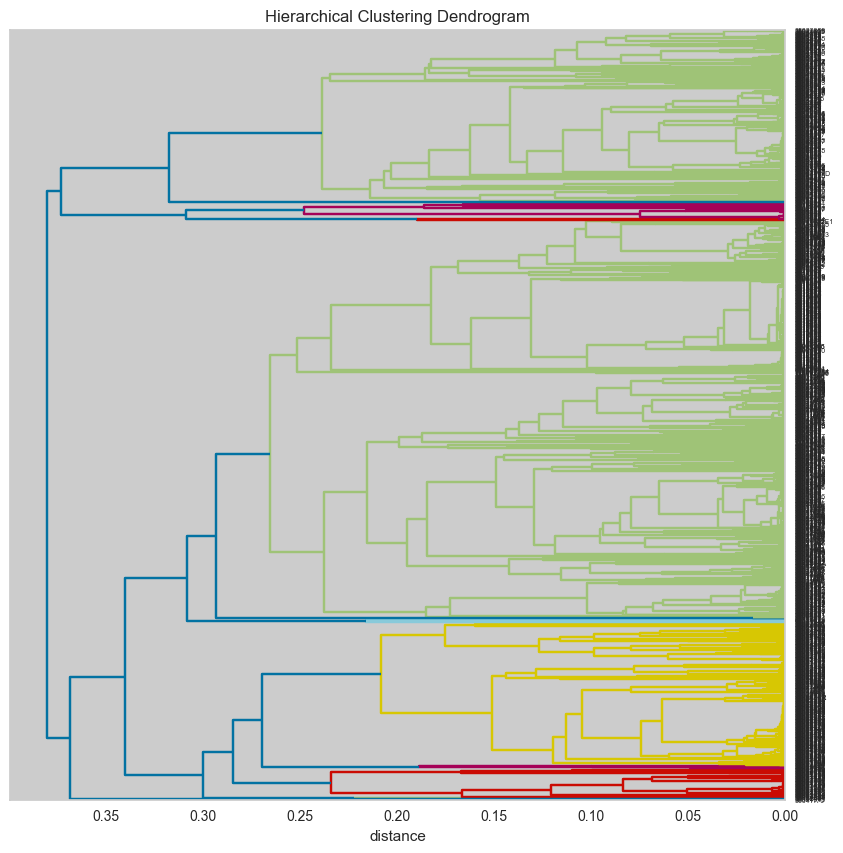

In [133]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

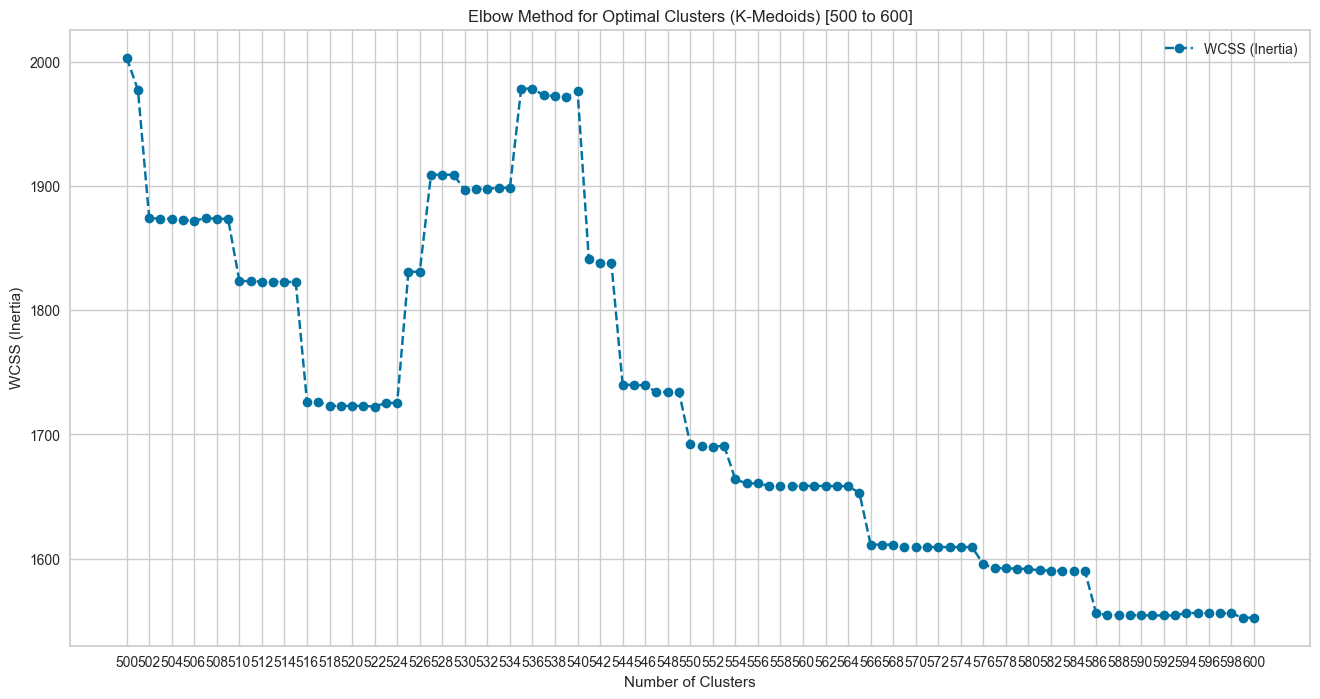

In [22]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 500, 600)

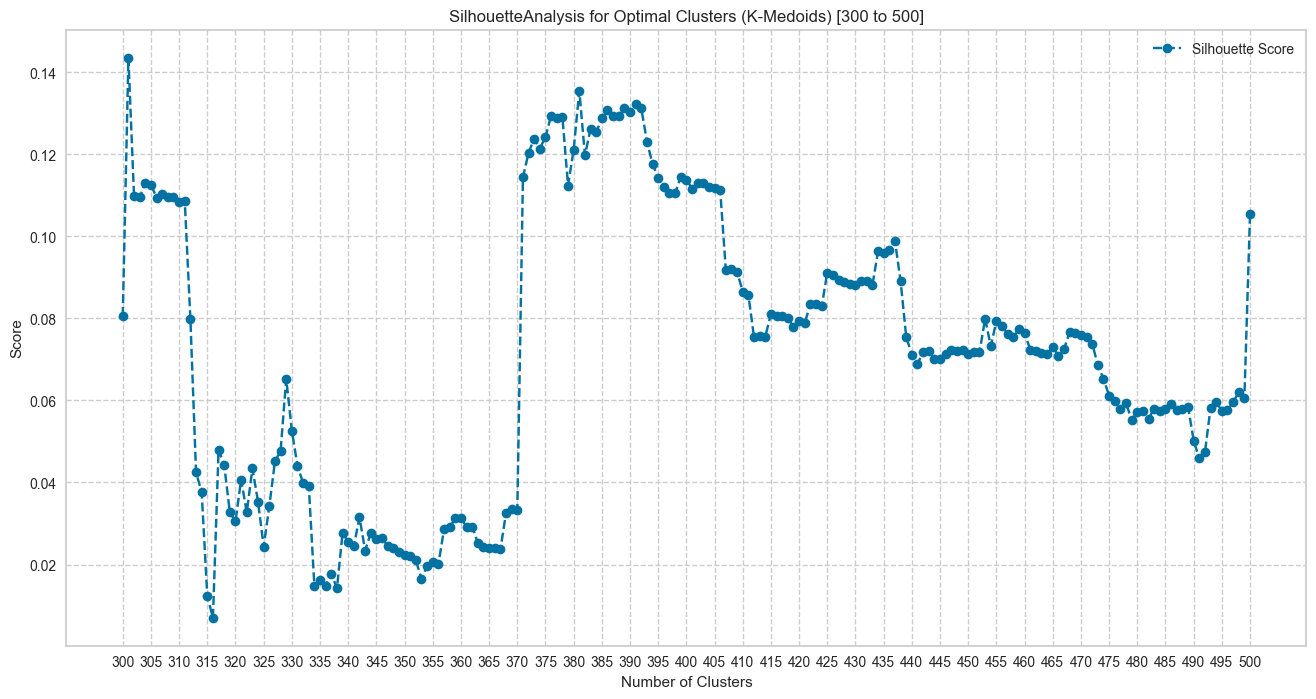

In [ ]:
clustering.silhouette_score_kmedoids(data_preprocessed, 300, 500)

__Evaluation__

In [ ]:
labels = clustering.agglomerative_clustering(distance_matrix, 505)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('/Users/kaspar/Documents/FIR/Prevelop/results/results_roemheld_aggl_505.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 1.014441483874011,
 'ch-score': 60.872757075140214,
 'dunn-index': 0.6070728726994514,
 'silhouette-score': 0.23790911596086636}

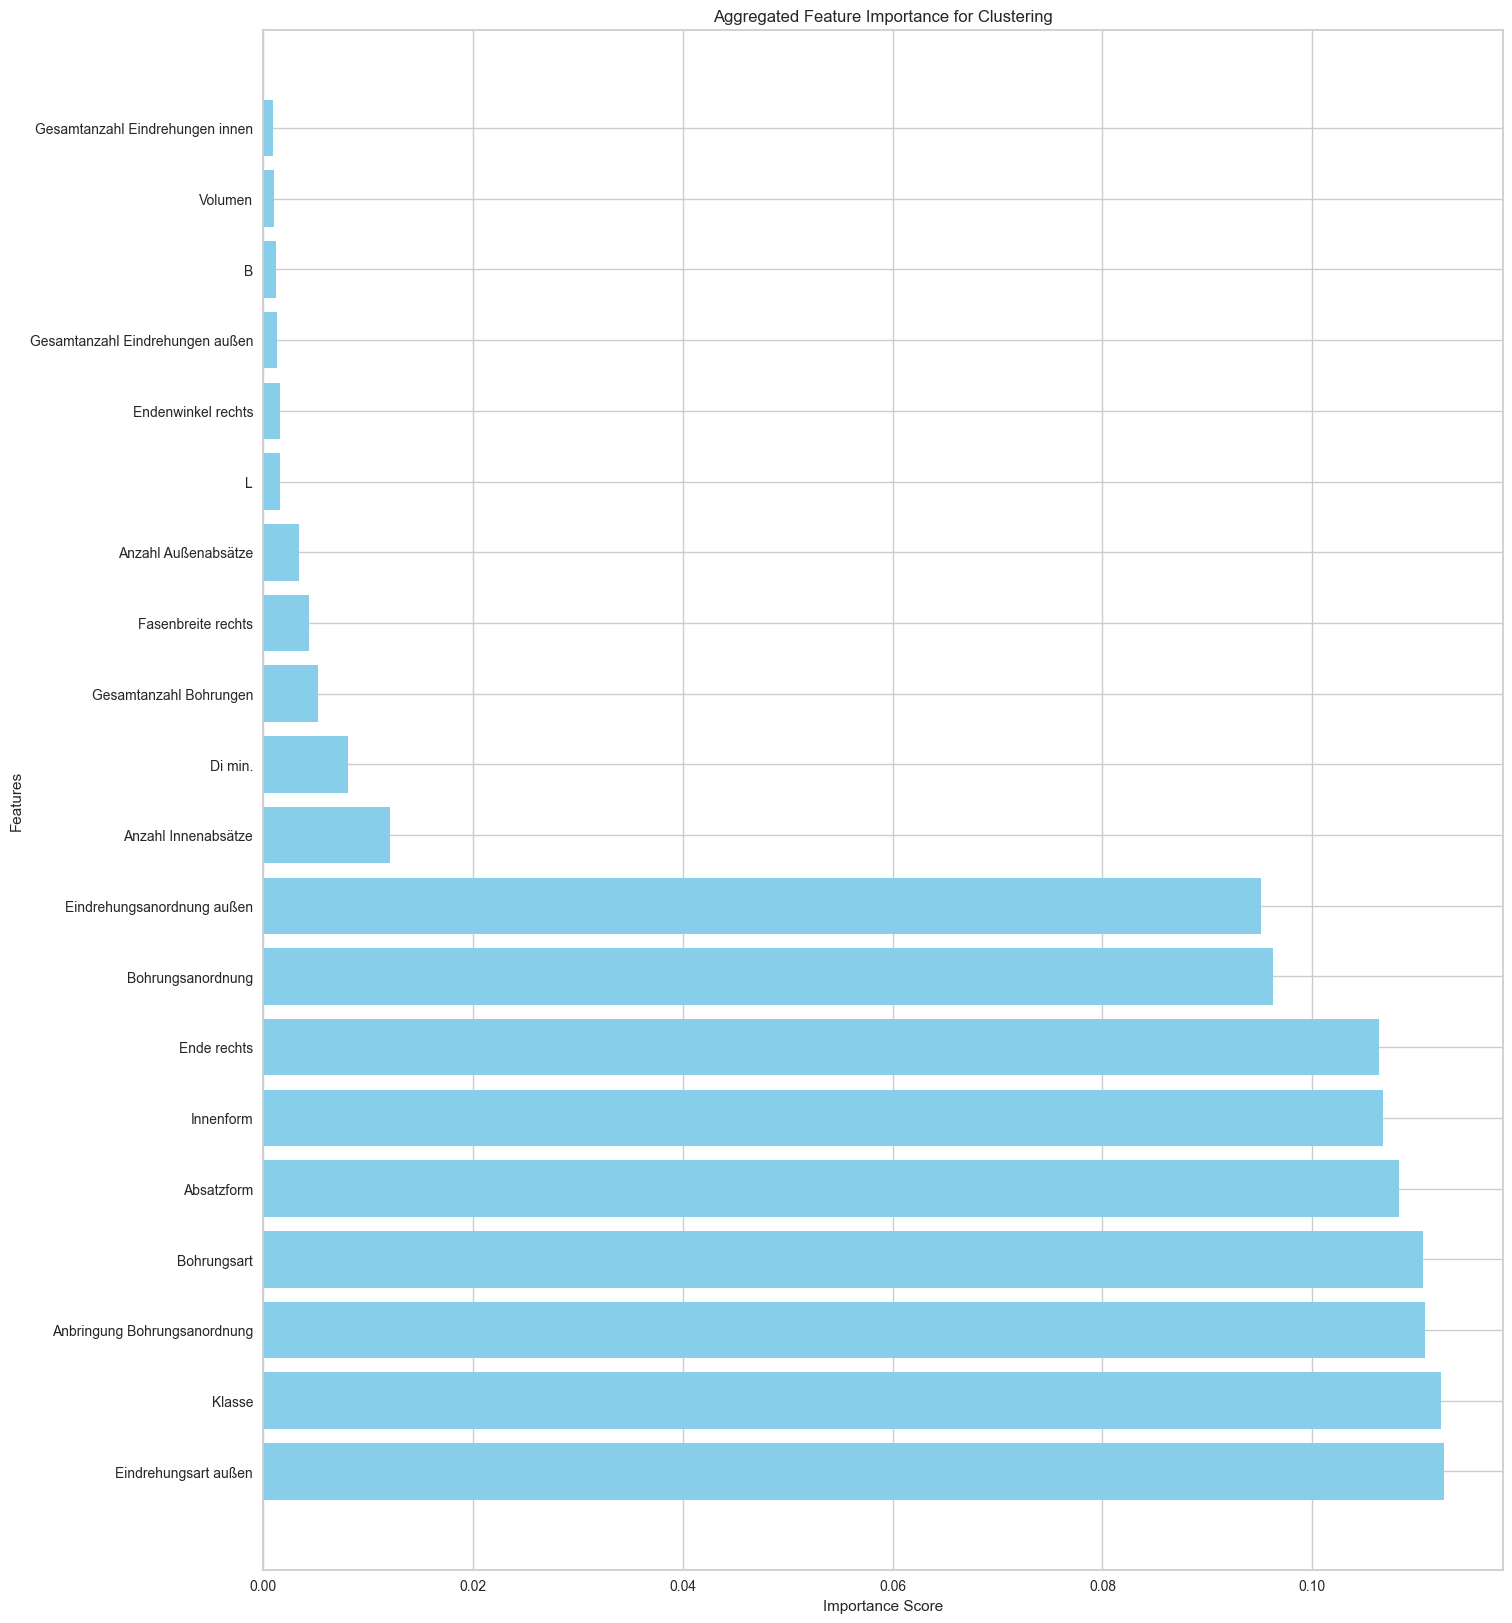

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

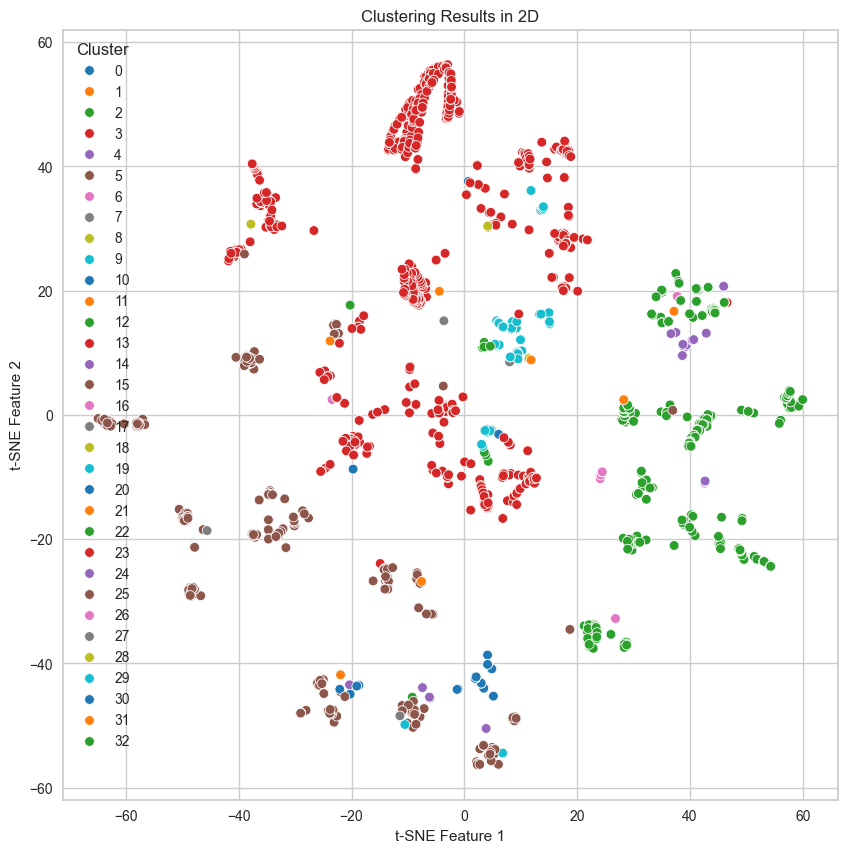

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [ ]:
labels = clustering.kmedoids_clustering(distance_matrix, 568)

In [ ]:
# # export the results to a excel file, dataframe with columms 'ID' and 'Cluster'
# df = pd.DataFrame(data={'ID': data.index, 'Cluster': labels})
# df.to_excel('/Users/kaspar/Documents/FIR/Prevelop/results/results_roemheld_kmedoids_568.xlsx', index=False)

In [ ]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 2.6154407132077835,
 'ch-score': 129.55127662274955,
 'dunn-index': 0.029228243927639334,
 'silhouette-score': 0.2034241651740714}

In [ ]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

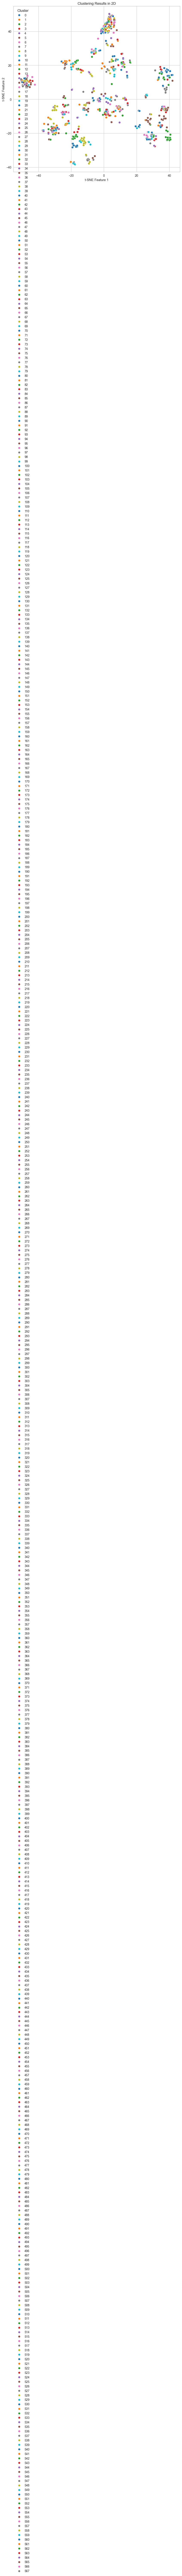

In [ ]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [ ]:
# load zeichnungen data 
zeichnungen = preparation.load_data('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/zeichnungen_roemheld.xlsx')
zeichnungen

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (3455709596.py, line 2)

In [58]:
# remove rows from link_data wehere value in 'Teil' does not appear as index of data
link_data_2 = link_data[link_data['Teil'].isin(data.index)]
link_data_2

,Teil,Zeichnung
0,3443693A,3443-693-A-V10-CAM
1,3500070,3500-070-PFA-CAM
2,3500071,3500-071-PFA-CAM
3,3500078,3500-078-PFA-CAM
4,3500081,3500-081-V10-CAM
...,...,...
2236,716697256,7166-972-56-V10-CAM
2237,716697257,7166-972-57-V10-CAM
2238,716697258,7166-972-58-V10-CAM
2239,716697263,7166-972-63-V10-CAM


In [59]:
# left join of zeichnungen and link_data on 'Zeichnung'
zeichnungen = pd.merge(zeichnungen, link_data_2, on='Zeichnung', how='left')
zeichnungen

,Zeichnung,Teil
0,3500-634-V10-CAM,3500634
1,3501-100-2-V10-CAM,35011002
2,3501-100-3-V10-CAM,35011003
3,3501-114-8-V10-CAM,35011148
4,3501-115-7-V10-CAM,35011157
...,...,...
2230,3507-056-V10-CAM,3507056
2231,3505-092-V10-CAM,3505092
2232,3506-057-V10-CAM,3506057
2233,3517-067-V10-CAM,3517067


In [60]:
# if a value in 'Teil is not null set it to 1, else set it to 0
zeichnungen['available'] = zeichnungen['Teil'].notnull().astype(int)

In [62]:
zeichnungen

,Zeichnung,Teil,available
0,3500-634-V10-CAM,3500634,1
1,3501-100-2-V10-CAM,35011002,1
2,3501-100-3-V10-CAM,35011003,1
3,3501-114-8-V10-CAM,35011148,1
4,3501-115-7-V10-CAM,35011157,1
...,...,...,...
2230,3507-056-V10-CAM,3507056,1
2231,3505-092-V10-CAM,3505092,1
2232,3506-057-V10-CAM,3506057,1
2233,3517-067-V10-CAM,3517067,1


In [64]:
# export it to a excel file zeichnungen_2
zeichnungen.to_excel('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/zeichnungen_3.xlsx', index=False)

In [63]:
# print zeichnungen that are not in data
print('Zeichnungen that are not in data:')
for index, row in zeichnungen.iterrows():
    if row['available'] == 0:
        print(row['Zeichnung'])
# remove rows from zeichnungen where value in 'available' is 0
zeichnungen = zeichnungen[zeichnungen['available'] == 1]
# remove column 'available'
zeichnungen = zeichnungen.drop(columns=['available'])
zeichnungen

Zeichnungen that are not in data:
3501-115-5-V10-CAM
3502-156-1-PFA-CAM
3502-228-6-PFA-CAM
3502-277-6-V10-CAM
3503-405-V10-CAM
3502-151-7-V10-CAM
3503-670-V10-CAM
3515-045-V10-CAM
3515-152-PFA-CAM


,Zeichnung,Teil
0,3500-634-V10-CAM,3500634
1,3501-100-2-V10-CAM,35011002
2,3501-100-3-V10-CAM,35011003
3,3501-114-8-V10-CAM,35011148
4,3501-115-7-V10-CAM,35011157
...,...,...
2230,3507-056-V10-CAM,3507056
2231,3505-092-V10-CAM,3505092
2232,3506-057-V10-CAM,3506057
2233,3517-067-V10-CAM,3517067


In [65]:
# export data to excel file with idex on the first column
data.to_excel('/Users/kaspar/Documents/FIR/Prevelop/data/Roemheld/roemheld_data_export.xlsx', index=True)